## Tutorial notebook on how to use the CLMS Data Store and its preload_data method

This notebook shows the preloading of pre-packaged EEA datasets that return multiple `.tif` files (which can be seen in the downloads folder) from CLMS that are then merged and converted to `.zarr` for efficient processing.

### Setup
In order to run this notebook, you need to install [`xcube_clms`](https://github.com/xcube-dev/xcube-clms). You can install it following either of the steps below:

1. via `conda-forge`
```bash
conda env create -f environment.yml
conda activate xcube-clms
conda install xcube-clms
```

2. via Development mode

```bash
git clone https://github.com/xcube-dev/xcube-clms.git
cd xcube-clms
conda env create -f environment.yml
conda activate xcube-clms
pip install .
```


Note that [`xcube_clms`](https://github.com/xcube-dev/xcube-clms) is a plugin of [`xcube`](https://xcube.readthedocs.io/en/latest/), where `xcube` is included in the `environment.yml`.  

You also need the credentials from the Land Monitoring service. Please follows the steps outlined [`here`](https://eea.github.io/clms-api-docs/authentication.html) to download your credentials and place them in the same directory as this notebook.

In [1]:
%%time
import json

from xcube.core.store import new_data_store

CPU times: user 2.58 s, sys: 315 ms, total: 2.89 s
Wall time: 1.54 s


To get the credentials.json, please follow the steps outlined [here](https://eea.github.io/clms-api-docs/authentication.html)

In [2]:
%%time
json_file_path = "credentials.json"
with open(json_file_path, "r") as j:
    credentials = json.loads(j.read())

CPU times: user 454 μs, sys: 69 μs, total: 523 μs
Wall time: 361 μs


When the user creates a new CLMS data store, it already sends requests to the CLMS API to get the catalog information which takes around 15-20 seconds. If no path is provided for the cache location, it will create a `clms_cache/` in the current directory to store all the downloaded data and initialize a local file store

In [3]:
%%time
clms_data_store = new_data_store("clms", credentials=credentials)

CPU times: user 603 ms, sys: 369 ms, total: 972 ms
Wall time: 10min 2s


The `Cache Store` within the CLMS data store is another data store which can be any user-defined data store. It defaults to the `file` store. Use `cache_id` and `cache_params` to provide information about the data store you would like to use for caching the preloaded data 

In [4]:
%%time
clms_data_store.cache_store.list_data_ids()

CPU times: user 1.59 ms, sys: 126 μs, total: 1.71 ms
Wall time: 1.05 ms


['daily-surface-soil-moisture-v1.0.zarr']

In [5]:
%%time
clms_data_store.cache_store.root

CPU times: user 4 μs, sys: 1 μs, total: 5 μs
Wall time: 8.82 μs


'/home/yogesh/Projects/BC/xcube-clms/examples/notebooks/clms_cache'

In [6]:
%%time
clms_data_store.get_data_store_params_schema()

CPU times: user 31 μs, sys: 8 μs, total: 39 μs
Wall time: 40.3 μs


With the following command, the users can see how the data_ids look like for the CLMS store. Due to the nature of the API, we came up with the computed data_id for some products containing several datasets within it that combines the product_id and item_id along with the `|` separator. But as a user, you dont have to worry about how it is created, but just that you need to use the complete data_id for interacting with any of the methods of this store.

In [7]:
%%time
clms_data_store.list_data_ids()

CPU times: user 2.03 ms, sys: 0 ns, total: 2.03 ms
Wall time: 2.04 ms


['lake-ice-extent-europe-v2-250m',
 'lake-water-quality-near-real-time-v2-0-300m',
 'clc-backbone-2021|CLMS_CLCplus_RASTER_2021',
 'burnt-area-v3-1-daily-300m',
 'clc-backbone-2018|CLMS_CLCplus_RASTER_2018_010m_eu_03035_V1_1',
 'forest-type-2015|FTY_2015_100m_eu_03035_d02_Full',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_Full',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E00N20',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E10N00',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E10N10',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E10N20',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N10',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N20',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N30',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N40',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N50',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E30N10',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E30N20',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E30N30',
 'fores

In [8]:
%%time
clms_data_store.get_data_opener_ids()

CPU times: user 3 μs, sys: 1e+03 ns, total: 4 μs
Wall time: 5.48 μs


('dataset:zarr:file',)

In [9]:
%%time
clms_data_store.get_data_types()

CPU times: user 7 μs, sys: 0 ns, total: 7 μs
Wall time: 8.82 μs


('dataset',)

In [10]:
%%time
clms_data_store.get_preload_data_params_schema()

CPU times: user 48 μs, sys: 0 ns, total: 48 μs
Wall time: 50.1 μs


In [11]:
%%time
clms_data_store.has_data(
    "imperviousness-classified-change-2015-2018|IMCC_1518_020m_is_03035_v010"
)

CPU times: user 120 μs, sys: 27 μs, total: 147 μs
Wall time: 150 μs


True

In [12]:
%%time
dataset_to_preload = (
    "imperviousness-classified-change-2015-2018|IMCC_1518_020m_is_03035_v010",
)

CPU times: user 2 μs, sys: 1 μs, total: 3 μs
Wall time: 4.05 μs


When the user runs the `preload_data` method, it returns a new cache data store with which the user can view its status using table provided via the returned `.preload_handle`, which indicates the status of the download request along with its progress, messages and exceptions, if any. It can be run in both blocking and non-blocking way. The user can silent the progress using the silent flag. The user can also choose to cleanup the downloads.

In [13]:
%%time
cache_data_store = clms_data_store.preload_data(
    *dataset_to_preload,
    blocking=True,  # Defaults to True
    cleanup=True,  # Defaults to True,
    silent=False,  # Defaults to False
    tile_size=2000,  # Defaults to 2000. You can pass a single integer, or a tuple of (int, int)
)

CPU times: user 13.3 s, sys: 15.9 s, total: 29.2 s
Wall time: 1min 50s


In [14]:
%%time
handle = cache_data_store.preload_handle
handle

CPU times: user 7 μs, sys: 7 μs, total: 14 μs
Wall time: 16.5 μs


Data ID,Status,Progress,Message,Exception
imperviousness-classified-change-2015-2018|IMCC_1518_020m_is_03035_v010,STOPPED,100%,Task ID 48578701563: Preloading Complete.,-


Now that the preload is completed, the user can open the data using open_data as usual which uses the file data store underneath at the cache location

In [15]:
%%time
cache_data_store.list_data_ids()

CPU times: user 430 μs, sys: 428 μs, total: 858 μs
Wall time: 580 μs


['imperviousness-classified-change-2015-2018|IMCC_1518_020m_is_03035_v010.zarr',
 'daily-surface-soil-moisture-v1.0.zarr']

In [16]:
cache_data_store.get_open_data_params_schema()

In [17]:
cache_data_store.get_open_data_params_schema(
    "imperviousness-classified-change-2015-2018|IMCC_1518_020m_is_03035_v010.zarr"
)

In [18]:
%%time
icc = cache_data_store.open_data(
    "imperviousness-classified-change-2015-2018|IMCC_1518_020m_is_03035_v010.zarr"
)
icc

CPU times: user 22.3 ms, sys: 9.28 ms, total: 31.6 ms
Wall time: 57.5 ms


<xarray.Dataset> Size: 6GB
Dimensions:                       (y: 25000, x: 30000)
Coordinates:
  * x                             (x) float64 240kB 2.7e+06 2.7e+06 ... 3.3e+06
  * y                             (y) float64 200kB 4.7e+06 4.7e+06 ... 5.2e+06
Data variables:
    IMCC_1518_020m_is_03035_v010  (y, x) float64 6GB dask.array<chunksize=(2000, 2000), meta=np.ndarray>
    spatial_ref                   int64 8B ...
Attributes:
    AREA_OR_POINT:  Area
    DataType:       Generic

CPU times: user 510 ms, sys: 115 ms, total: 625 ms
Wall time: 504 ms


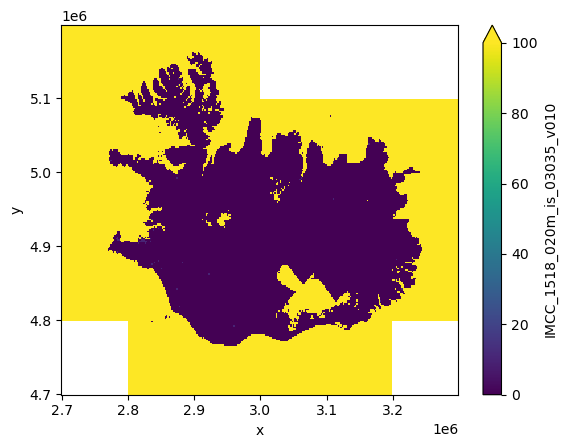

In [19]:
%%time
downsampled_cube = icc.isel(
    x=slice(None, None, 100),
    y=slice(None, None, 100),
)
downsampled_cube.IMCC_1518_020m_is_03035_v010.plot(vmin=0, vmax=100)

Execute the following command to terminate the preload job and trigger the cleanup process to clean the `downloads` directory. This step is only necessary if the preload job was originally run with `cleanup=False`, as downloads will not be removed automatically in that case. If `cleanup=True` was used (which is the default), the cleanup is performed automatically upon completion of the preload job.

In [20]:
handle.close()
handle

Data ID,Status,Progress,Message,Exception
imperviousness-classified-change-2015-2018|IMCC_1518_020m_is_03035_v010,STOPPED,100%,Cleaning up Finished.,-
